In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-f7tg6jd8
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-f7tg6jd8
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 6ae390f2912c6d0521a1d5860f8f2aeb4089ccee
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for chronos: filename=chronos-1.1.0-py3-none-any.whl size=13527 sha256=0ba65b2cf9ba17a931861c4eae17f84e9e776541e0c7d3d4e5223eedb607be0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-dwkj1sqz/wheels/bf/c1/65/08857e57345ef1b34ba0edb4791f1b2594943e82f34e93a4ab
Successfully built chronos


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline
from tqdm.auto import tqdm

In [3]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",
  device_map="cuda", 
  torch_dtype=torch.bfloat16,
)

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/806M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [4]:
def load_model():
 pipeline = ChronosPipeline.from_pretrained(
 "amazon/chronos-t5-base",
 device_map="cuda", 
 torch_dtype=torch.bfloat16,
 )
 return pipeline
 
def predict(pipeline, timeseries, prediction_length=12):
 """given a timeseries, predict with chronos model"""
 forecast = pipeline.predict(timeseries, prediction_length, num_samples=1)[0][0]  # shape [num_series, num_samples, prediction_length]
 return forecast

def visualize(timeseries, forecast, ground_truth=None, xlim=None, ylim=None):
 # visualize the forecast
 assert isinstance(timeseries, torch.Tensor) and isinstance(forecast, torch.Tensor), "timeseries and forecast should be numpy arrays"
 
 plt.figure(figsize=(8, 4))
 plt.plot(range(len(timeseries)), timeseries, color="royalblue", label="historical data")
 plt.plot(range(len(timeseries)-1, len(timeseries) - 1 + len(forecast)), forecast, color="tomato", label="forecast")
 if ground_truth is not None:
  plt.plot(range(len(timeseries)-1, len(timeseries) - 1 + len(ground_truth)), ground_truth, color="green", label="ground truth")
 if xlim is not None:
  plt.xlim(xlim)
 if ylim is not None:
  plt.ylim(ylim)
 plt.legend()
 plt.grid()
 plt.show()

In [5]:
pipeline = load_model()
example_timeseries = torch.tensor(range(100), dtype=torch.float32)
forecast = predict(pipeline, example_timeseries)

2024-04-30 08:45:06.900844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 08:45:06.901012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 08:45:07.009164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


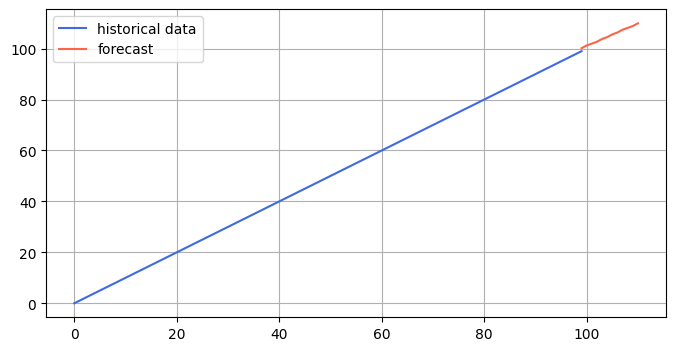

In [6]:
visualize(example_timeseries, forecast)